In [153]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [154]:
!unzip /content/playground-series-s5e1.zip

Archive:  /content/playground-series-s5e1.zip
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [155]:
df = pd.read_csv('train.csv')
df.head()

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0


In [156]:
df.describe()

,id,num_sold
count,230130.000000,221259.000000
mean,115064.500000,752.527382
std,66432.953062,690.165445
min,0.000000,5.000000
25%,57532.250000,219.000000
50%,115064.500000,605.000000
75%,172596.750000,1114.000000
max,230129.000000,5939.000000


In [157]:
df['product'].value_counts()

,count
product,
Holographic Goose,46026
Kaggle,46026
Kaggle Tiers,46026
Kerneler,46026
Kerneler Dark Mode,46026


In [158]:
df.columns

Index(['id', 'date', 'country', 'store', 'product', 'num_sold'], dtype='object')

In [159]:
df.isnull().sum()

,0
id,0
date,0
country,0
store,0
product,0
num_sold,8871


In [160]:
df.dropna(inplace=True)

In [161]:
df

,id,date,country,store,product,num_sold
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0
5,5,2010-01-01,Canada,Stickers for Less,Holographic Goose,300.0
...,...,...,...,...,...,...
230125,230125,2016-12-31,Singapore,Premium Sticker Mart,Holographic Goose,466.0
230126,230126,2016-12-31,Singapore,Premium Sticker Mart,Kaggle,2907.0
230127,230127,2016-12-31,Singapore,Premium Sticker Mart,Kaggle Tiers,2299.0
230128,230128,2016-12-31,Singapore,Premium Sticker Mart,Kerneler,1242.0


In [162]:
df['country'].value_counts()

,count
country,
Finland,38355
Italy,38355
Norway,38355
Singapore,38355
Canada,34109
Kenya,33730


In [163]:
df['store'].value_counts()

,count
store,
Premium Sticker Mart,75684
Stickers for Less,74044
Discount Stickers,71531


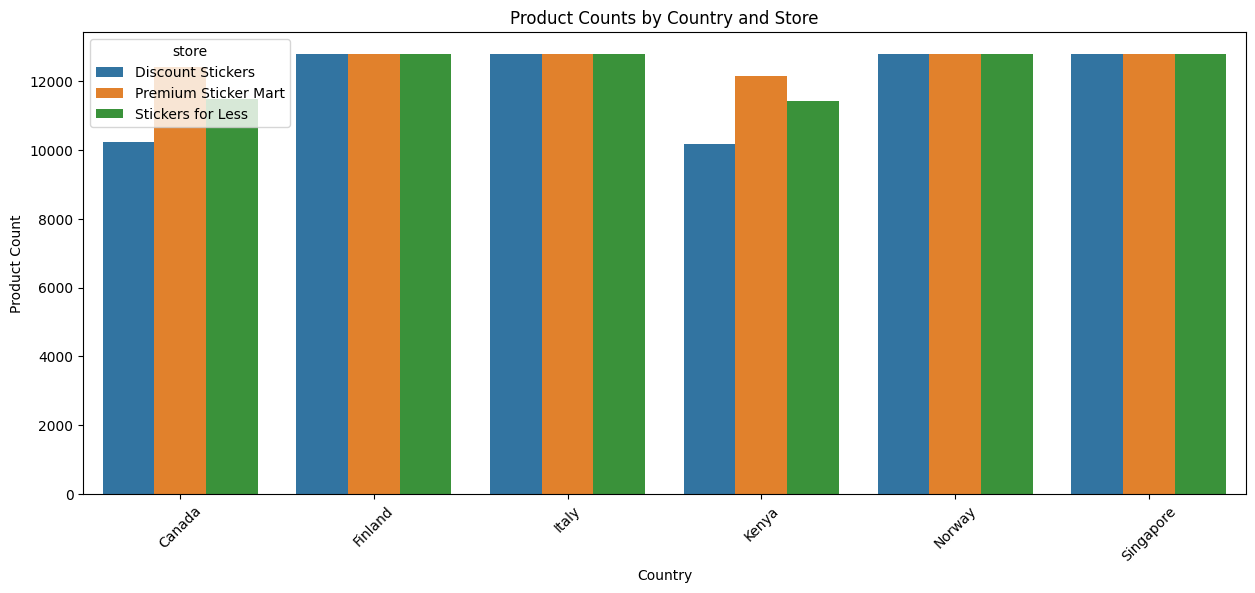

In [164]:
# prompt: make a bar plot of counts in different countries, with 3 bars for 3 stores in each country

country_store_counts = df.groupby(['country', 'store'])['product'].count().reset_index()

plt.figure(figsize=(15, 6))
sns.barplot(x='country', y='product', hue='store', data=country_store_counts)
plt.xlabel('Country')
plt.ylabel('Product Count')
plt.title('Product Counts by Country and Store')
plt.xticks(rotation=45)
plt.show()

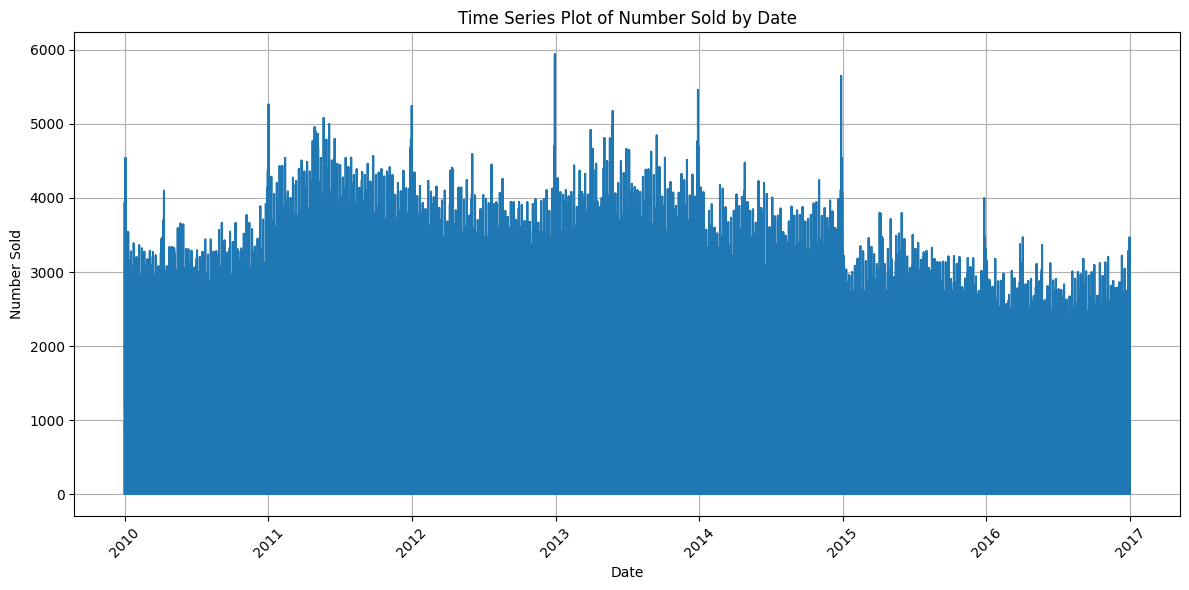

In [165]:
# prompt: time series plot by dates, num_sold by date

import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and has columns 'date' and 'num_sold'
# If your date column is not already datetime objects, convert it:
df['date'] = pd.to_datetime(df['date'])

plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['num_sold'])
plt.xlabel('Date')
plt.ylabel('Number Sold')
plt.title('Time Series Plot of Number Sold by Date')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

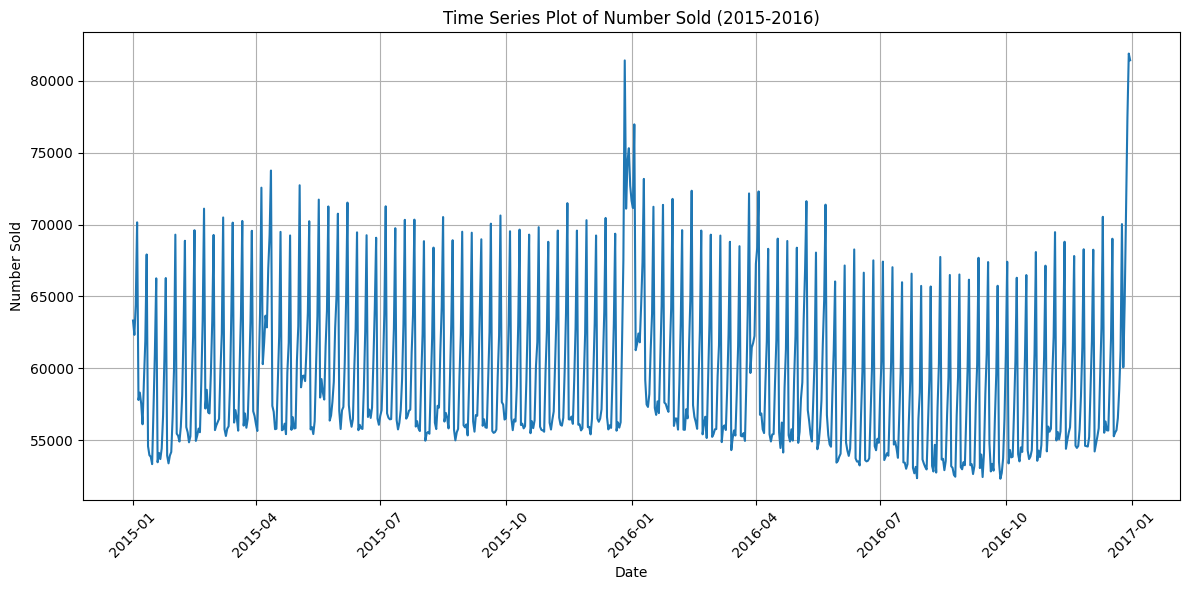

In [26]:
# prompt: same time sereis plot for 2015-2016

# Filter data for 2015-2016
df_2015_2016 = df[(df['date'] >= '2015-01-01') & (df['date'] <= '2016-12-31')]

# Group data by date and sum num_sold
daily_sales_2015_2016 = df_2015_2016.groupby('date')['num_sold'].sum().reset_index()


plt.figure(figsize=(12, 6))
plt.plot(daily_sales_2015_2016['date'], daily_sales_2015_2016['num_sold'])
plt.xlabel('Date')
plt.ylabel('Number Sold')
plt.title('Time Series Plot of Number Sold (2015-2016)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

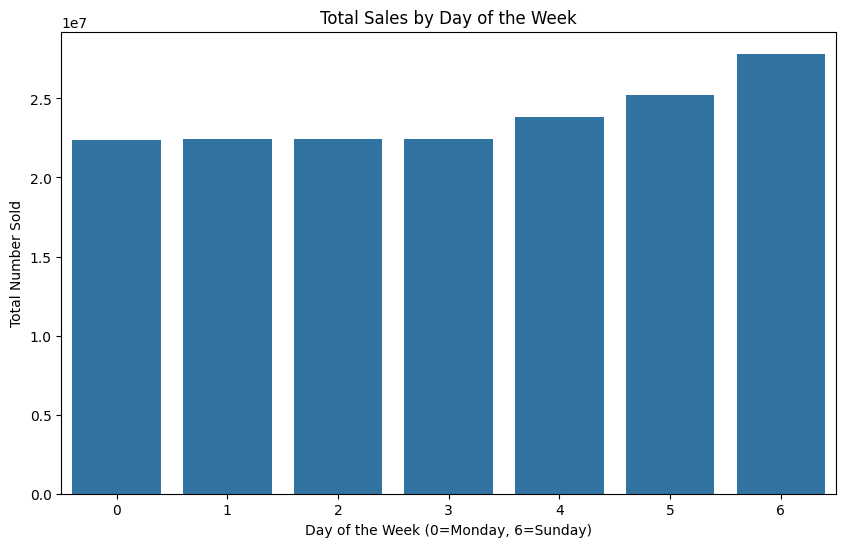

In [166]:
# prompt: plot for day of the week

# Assuming your DataFrame is named 'df' and has a 'date' column
# Convert the 'date' column to datetime objects if it's not already
df['date'] = pd.to_datetime(df['date'])

# Extract the day of the week (0 = Monday, 6 = Sunday)
df['day_of_week'] = df['date'].dt.dayofweek

# Group by day of the week and sum 'num_sold'
day_sales = df.groupby('day_of_week')['num_sold'].sum()

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x=day_sales.index, y=day_sales.values)
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Total Number Sold')
plt.title('Total Sales by Day of the Week')
plt.xticks(range(7))  # Ensure all days are shown on the x-axis
plt.show()

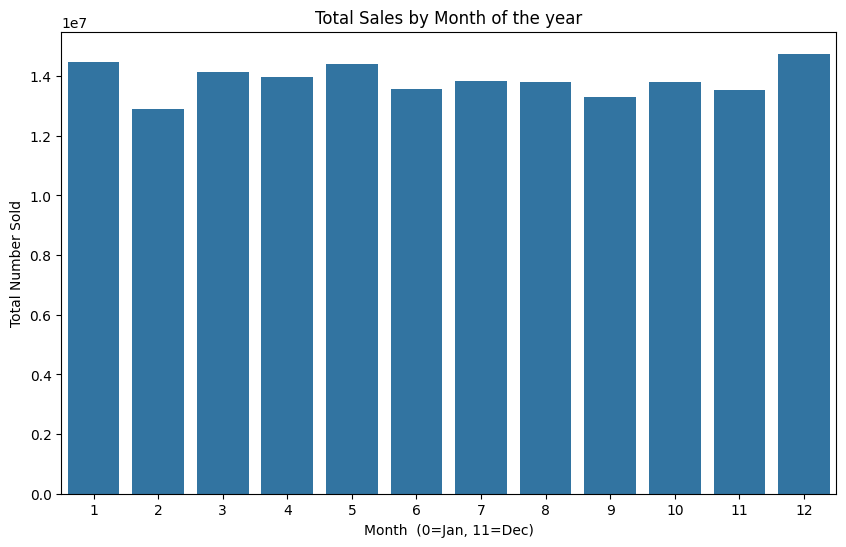

In [168]:
df['date'] = pd.to_datetime(df['date'])

df['month'] = df['date'].dt.month

# Group by day of the week and sum 'num_sold'
month_sales = df.groupby('month')['num_sold'].sum()

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x=month_sales.index, y=month_sales.values)
plt.xlabel('Month  (0=Jan, 11=Dec)')
plt.ylabel('Total Number Sold')
plt.title('Total Sales by Month of the year')
plt.xticks(range(12))  # Ensure all days are shown on the x-axis
plt.show()

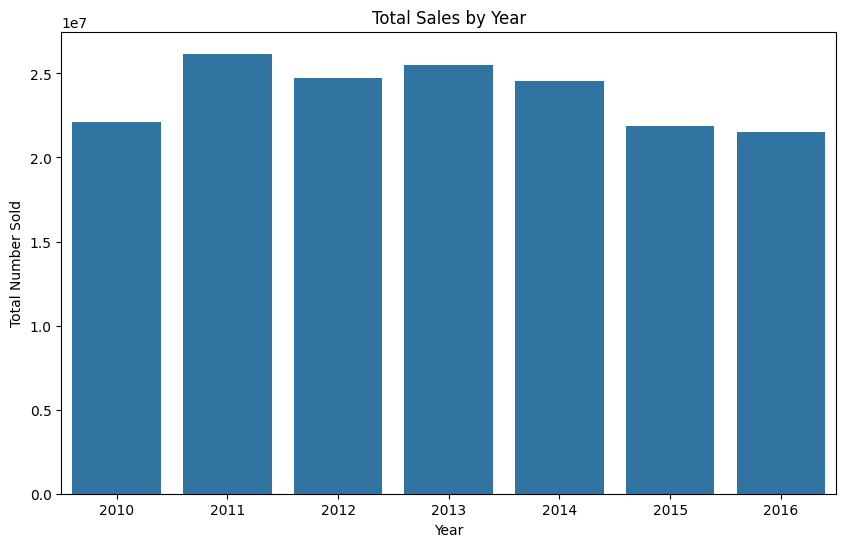

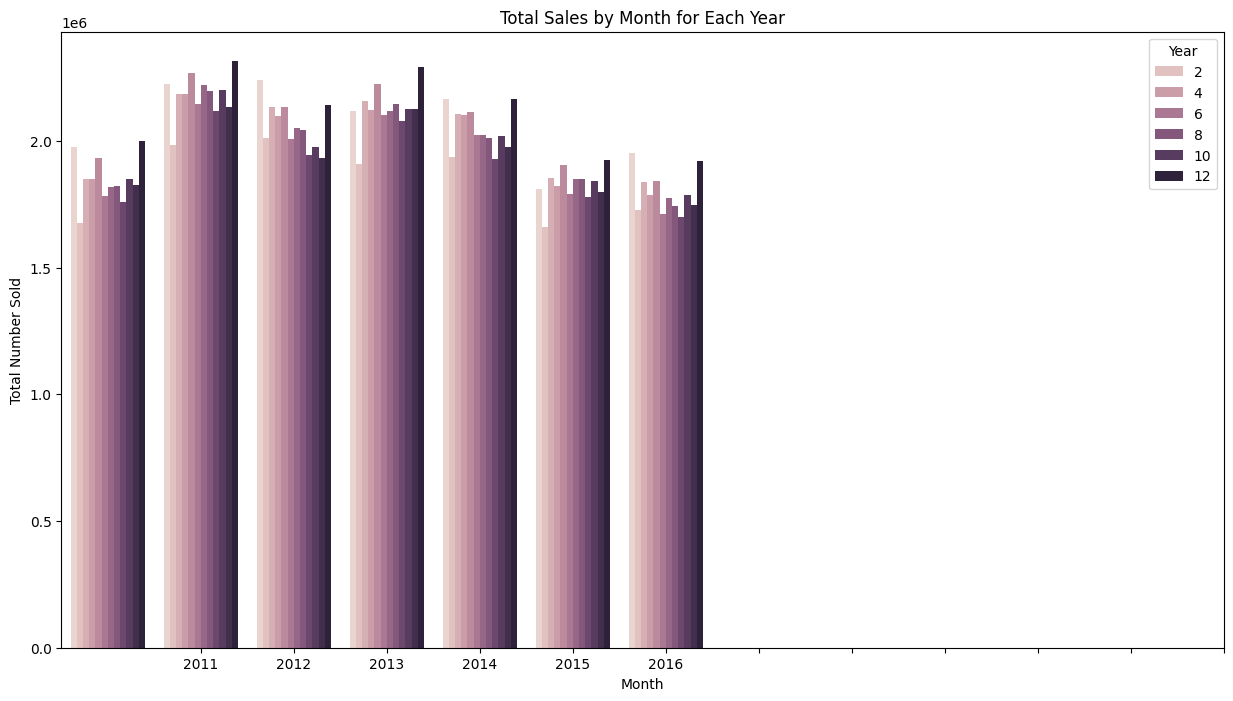

In [171]:
# prompt: total sale by year barplot, as well as 12 bars for months of every year

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df' and has a 'date' column
# Convert the 'date' column to datetime objects if it's not already
df['date'] = pd.to_datetime(df['date'])

# Extract year and month
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Calculate total sales by year
yearly_sales = df.groupby('year')['num_sold'].sum()

# Create the bar plot for yearly sales
plt.figure(figsize=(10, 6))
sns.barplot(x=yearly_sales.index, y=yearly_sales.values)
plt.xlabel('Year')
plt.ylabel('Total Number Sold')
plt.title('Total Sales by Year')
plt.show()


# Calculate total sales by year and month
year_month_sales = df.groupby(['year', 'month'])['num_sold'].sum().reset_index()

# Create the bar plot for monthly sales within each year
plt.figure(figsize=(15, 8))
sns.barplot(x='year', y='num_sold', hue='month', data=year_month_sales)
plt.xlabel('Month')
plt.ylabel('Total Number Sold')
plt.title('Total Sales by Month for Each Year')
plt.xticks(range(1, 13))  # Ensure all months are shown on the x-axis
plt.legend(title='Year')
plt.show()

In [172]:
# prompt: make 3 columns, day of the week, month and year

# Assuming your DataFrame is named 'df' and has a 'date' column
# Convert the 'date' column to datetime objects if it's not already
df['date'] = pd.to_datetime(df['date'])

# Extract the day of the week (0 = Monday, 6 = Sunday), month, and year
df['day_of_week'] = df['date'].dt.dayofweek
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

# Now you have three new columns: 'day_of_week', 'month', and 'year'
print(df.head())

   id       date country              store             product  num_sold  \
1   1 2010-01-01  Canada  Discount Stickers              Kaggle     973.0   
2   2 2010-01-01  Canada  Discount Stickers        Kaggle Tiers     906.0   
3   3 2010-01-01  Canada  Discount Stickers            Kerneler     423.0   
4   4 2010-01-01  Canada  Discount Stickers  Kerneler Dark Mode     491.0   
5   5 2010-01-01  Canada  Stickers for Less   Holographic Goose     300.0   

   day_of_week  month  year  
1            4      1  2010  
2            4      1  2010  
3            4      1  2010  
4            4      1  2010  
5            4      1  2010  


In [173]:
df

,id,date,country,store,product,num_sold,day_of_week,month,year
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0,4,1,2010
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0,4,1,2010
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0,4,1,2010
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0,4,1,2010
5,5,2010-01-01,Canada,Stickers for Less,Holographic Goose,300.0,4,1,2010
...,...,...,...,...,...,...,...,...,...
230125,230125,2016-12-31,Singapore,Premium Sticker Mart,Holographic Goose,466.0,5,12,2016
230126,230126,2016-12-31,Singapore,Premium Sticker Mart,Kaggle,2907.0,5,12,2016
230127,230127,2016-12-31,Singapore,Premium Sticker Mart,Kaggle Tiers,2299.0,5,12,2016
230128,230128,2016-12-31,Singapore,Premium Sticker Mart,Kerneler,1242.0,5,12,2016


### Num_sold is high on new years'


In [174]:
df.drop('id',axis = 1)

,date,country,store,product,num_sold,day_of_week,month,year
1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0,4,1,2010
2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0,4,1,2010
3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0,4,1,2010
4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0,4,1,2010
5,2010-01-01,Canada,Stickers for Less,Holographic Goose,300.0,4,1,2010
...,...,...,...,...,...,...,...,...
230125,2016-12-31,Singapore,Premium Sticker Mart,Holographic Goose,466.0,5,12,2016
230126,2016-12-31,Singapore,Premium Sticker Mart,Kaggle,2907.0,5,12,2016
230127,2016-12-31,Singapore,Premium Sticker Mart,Kaggle Tiers,2299.0,5,12,2016
230128,2016-12-31,Singapore,Premium Sticker Mart,Kerneler,1242.0,5,12,2016


In [175]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [176]:
df.drop(columns = ['id','date'],inplace = True)

In [177]:
df

,country,store,product,num_sold,day_of_week,month,year
1,Canada,Discount Stickers,Kaggle,973.0,4,1,2010
2,Canada,Discount Stickers,Kaggle Tiers,906.0,4,1,2010
3,Canada,Discount Stickers,Kerneler,423.0,4,1,2010
4,Canada,Discount Stickers,Kerneler Dark Mode,491.0,4,1,2010
5,Canada,Stickers for Less,Holographic Goose,300.0,4,1,2010
...,...,...,...,...,...,...,...
230125,Singapore,Premium Sticker Mart,Holographic Goose,466.0,5,12,2016
230126,Singapore,Premium Sticker Mart,Kaggle,2907.0,5,12,2016
230127,Singapore,Premium Sticker Mart,Kaggle Tiers,2299.0,5,12,2016
230128,Singapore,Premium Sticker Mart,Kerneler,1242.0,5,12,2016


In [178]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['product'] = le.fit_transform(df['product'])
df['country'] =le.fit_transform(df['country'])
df['store'] = le.fit_transform(df['store'])
df['year'] = le.fit_transform(df['year'])
df

,country,store,product,num_sold,day_of_week,month,year
1,0,0,1,973.0,4,1,0
2,0,0,2,906.0,4,1,0
3,0,0,3,423.0,4,1,0
4,0,0,4,491.0,4,1,0
5,0,2,0,300.0,4,1,0
...,...,...,...,...,...,...,...
230125,5,1,0,466.0,5,12,6
230126,5,1,1,2907.0,5,12,6
230127,5,1,2,2299.0,5,12,6
230128,5,1,3,1242.0,5,12,6


<Axes: >

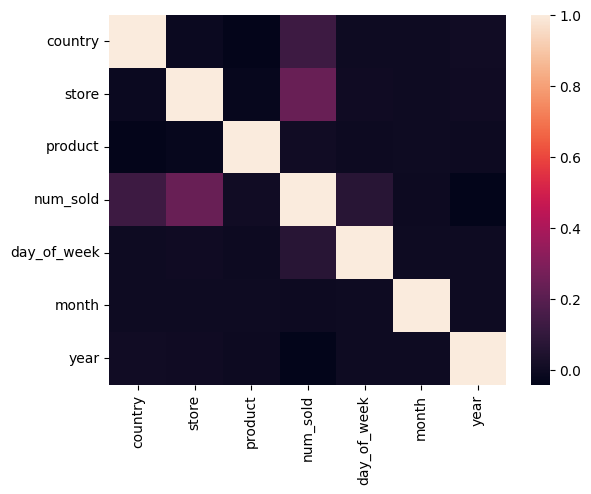

In [179]:
sns.heatmap(df.corr())

In [180]:
X = df.drop('num_sold',axis = 1)
y = df['num_sold']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [181]:
rf= RandomForestRegressor(n_estimators=50,max_depth = 10,min_samples_split =2 ,min_samples_leaf = 2,random_state=101)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=2, n_estimators=50,
                      random_state=101)

In [201]:
# prompt: find the hyperparameters for random forest regressor using gridsearchcv

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None,10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Create a RandomForestRegressor object
rf = RandomForestRegressor(random_state=101)
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_absolute_percentage_error',  # Use negative MAPE for scoring
                           n_jobs=-1,
                           verbose=2)  # Set verbose to 2 to display results for each parameter set

grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Get the results and calculate MAPE
results = grid_search.cv_results_
for mean_score, params in zip(results['mean_test_score'], results['params']):
    print(f"MAPE: {-mean_score:.4f} with parameters: {params}")  # Convert negative MAPE back to positive

# Evaluate the model with best hyperparameters
best_rf = grid_search.best_estimator_
# ... (rest of your evaluation code)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
MAPE: 0.0613 with parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
MAPE: 0.0612 with parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
MAPE: 0.0584 with parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
MAPE: 0.0584 with parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
MAPE: 0.0577 with parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
MAPE: 0.0576 with parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
MAPE: 0.0574 with parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
MAPE: 0.0573 with parameters: {'max_depth': None, 'min_samples_leaf'

In [202]:
rf = RandomForestRegressor(n_estimators=100,max_depth = None,min_samples_split =5 ,min_samples_leaf = 2,random_state=101)
rf.fit(X_train,y_train)

RandomForestRegressor(min_samples_leaf=2, min_samples_split=5, random_state=101)

In [203]:

from sklearn.metrics import mean_absolute_percentage_error

# Predict on the test set
predictions = rf.predict(X_test)

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, predictions)
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

Mean Absolute Percentage Error (MAPE): 0.05727603112008438


In [204]:
testing = pd.read_csv('test.csv')
testing

,id,date,country,store,product
0,230130,2017-01-01,Canada,Discount Stickers,Holographic Goose
1,230131,2017-01-01,Canada,Discount Stickers,Kaggle
2,230132,2017-01-01,Canada,Discount Stickers,Kaggle Tiers
3,230133,2017-01-01,Canada,Discount Stickers,Kerneler
4,230134,2017-01-01,Canada,Discount Stickers,Kerneler Dark Mode
...,...,...,...,...,...
98545,328675,2019-12-31,Singapore,Premium Sticker Mart,Holographic Goose
98546,328676,2019-12-31,Singapore,Premium Sticker Mart,Kaggle
98547,328677,2019-12-31,Singapore,Premium Sticker Mart,Kaggle Tiers
98548,328678,2019-12-31,Singapore,Premium Sticker Mart,Kerneler


In [205]:
testing['date'] = pd.to_datetime(testing['date'])
testing['day_of_week'] = testing['date'].dt.dayofweek
testing['month'] = testing['date'].dt.month
testing['year'] = testing['date'].dt.year

In [206]:
testing.drop(columns ='date',inplace = True)

In [207]:
testing['product'] = le.fit_transform(testing['product'])
testing['country']= le.fit_transform(testing['country'])
testing['store'] =le.fit_transform(testing['store'])
testing['year'] = le.fit_transform(testing['year'])

In [208]:
testing

,id,country,store,product,day_of_week,month,year
0,230130,0,0,0,6,1,0
1,230131,0,0,1,6,1,0
2,230132,0,0,2,6,1,0
3,230133,0,0,3,6,1,0
4,230134,0,0,4,6,1,0
...,...,...,...,...,...,...,...
98545,328675,5,1,0,1,12,2
98546,328676,5,1,1,1,12,2
98547,328677,5,1,2,1,12,2
98548,328678,5,1,3,1,12,2


In [209]:
testing.drop

<bound method DataFrame.drop of            id  country  store  product  day_of_week  month  year
0      230130        0      0        0            6      1     0
1      230131        0      0        1            6      1     0
2      230132        0      0        2            6      1     0
3      230133        0      0        3            6      1     0
4      230134        0      0        4            6      1     0
...       ...      ...    ...      ...          ...    ...   ...
98545  328675        5      1        0            1     12     2
98546  328676        5      1        1            1     12     2
98547  328677        5      1        2            1     12     2
98548  328678        5      1        3            1     12     2
98549  328679        5      1        4            1     12     2

[98550 rows x 7 columns]>

In [210]:
prediction = rf.predict(testing[['country','store','product','day_of_week','month','year']])

In [211]:
testing

,id,country,store,product,day_of_week,month,year
0,230130,0,0,0,6,1,0
1,230131,0,0,1,6,1,0
2,230132,0,0,2,6,1,0
3,230133,0,0,3,6,1,0
4,230134,0,0,4,6,1,0
...,...,...,...,...,...,...,...
98545,328675,5,1,0,1,12,2
98546,328676,5,1,1,1,12,2
98547,328677,5,1,2,1,12,2
98548,328678,5,1,3,1,12,2


In [212]:
testing['num_sold'] = prediction

In [213]:
testing

,id,country,store,product,day_of_week,month,year,num_sold
0,230130,0,0,0,6,1,0,139.540137
1,230131,0,0,1,6,1,0,776.221690
2,230132,0,0,2,6,1,0,721.238830
3,230133,0,0,3,6,1,0,346.260514
4,230134,0,0,4,6,1,0,465.679440
...,...,...,...,...,...,...,...,...
98545,328675,5,1,0,1,12,2,282.704722
98546,328676,5,1,1,1,12,2,1774.597365
98547,328677,5,1,2,1,12,2,1338.403216
98548,328678,5,1,3,1,12,2,837.836810


In [214]:
testing.drop(columns = ['country','store','product','day_of_week','month','year'],inplace = True)

In [215]:
testing

,id,num_sold
0,230130,139.540137
1,230131,776.221690
2,230132,721.238830
3,230133,346.260514
4,230134,465.679440
...,...,...
98545,328675,282.704722
98546,328676,1774.597365
98547,328677,1338.403216
98548,328678,837.836810


In [217]:
pd.DataFrame(testing).to_csv('prediction.csv',index=False)

In [147]:
from sklearn.linear_model import Lasso

In [148]:
lr = Lasso()
lr.fit(X_train,y_train)

Lasso()

In [149]:
lr.score(X_test,y_test)

0.0771177564087373

In [150]:
lr.predict(X_test)

array([839.77309799, 990.34434331, 885.43975699, ..., 735.12053444,
       636.8755709 , 826.7058752 ])

In [151]:
mean_absolute_percentage_error(y_test,lr.predict(X_test))

8.920886128990603